In [ ]:
Mushroom Project

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore
df=pd.read_csv("E:\mushrooms.csv")
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


loading data set

In [121]:
df.shape

(8124, 23)

It has 8124 rows 23 coloumns

In [122]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [123]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


veil_type has only one unique value so it wont affect the target column class.The bruises, gill-attachment,gill-spacing,gill-size has binary value

In [ ]:
HANDLING MISSING & NULL VALUES

In [151]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

no null values

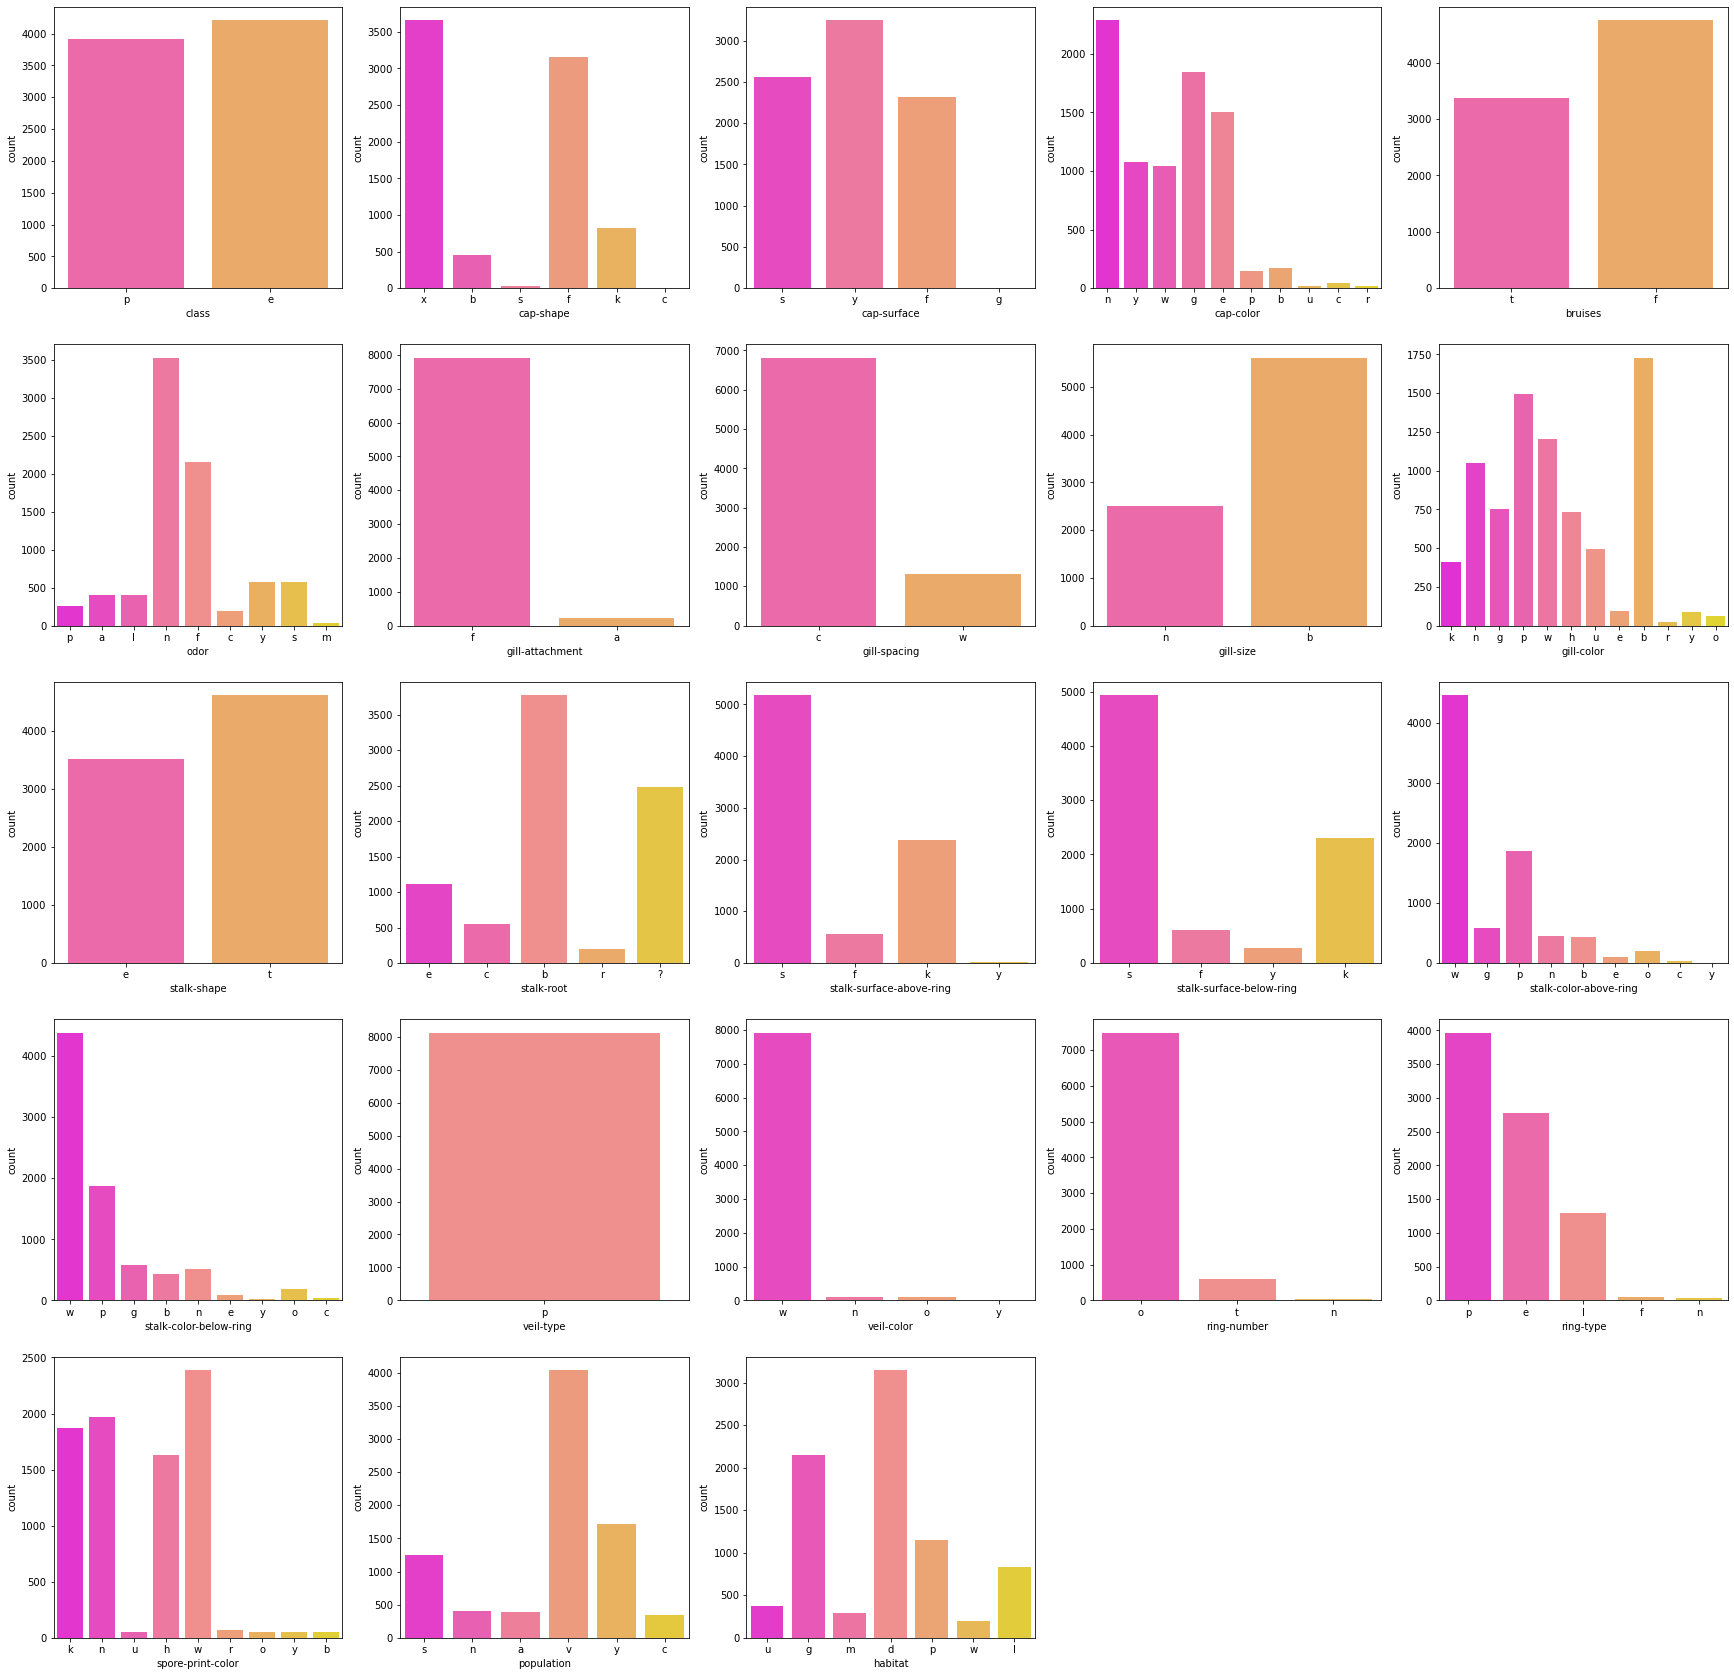

In [91]:
data=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
ncol=5
nrows=5
plt.figure(figsize=(30,30))
for i in range(0,23):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=data[i],data=df,palette="spring")
    ##print(data[i])

From the count plot we came to know stalk-root has? value

In [118]:
df.loc[df['stalk-root']=="?"]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [182]:
df['stalk-root'].unique

<bound method Series.unique of 0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object>

missing value in 2480 rows

In [152]:
data_clean=df

In [153]:
data_clean.loc[data_clean['stalk-root']=="?"]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [154]:
data_clean['stalk-root']=data_clean['stalk-root'].replace("?",np.nan)

In [155]:
data_clean.loc[data_clean['stalk-root']=='?']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


replacing ? value in stalk-root as nan

In [333]:
data_clean.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

now checking for null value it has 2480 null values 

In [156]:
data_clean=data_clean.fillna(data_clean.mode().iloc[0])

replacing null value by mode and checking again for missing value

In [157]:
data_clean.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Contigengy matrix class feature vs each feature.
To check each value impact on target value

In [123]:
class_stalkroot = pd.crosstab(data_clean['class'], data_clean['stalk-root'])
print(class_stalkroot)

stalk-root     b    c    e    r
class                          
e           1920  512  864  192
p           1856   44  256    0


In [124]:
class_veilcolor = pd.crosstab(data_clean['class'], data_clean['veil-color'])
print(class_veilcolor)

veil-color   n   o     w  y
class                      
e           96  96  4016  0
p            0   0  3908  8


In [125]:
class_capshape = pd.crosstab(data_clean['class'], data_clean['cap-shape'])
print(class_capshape)

cap-shape    b  c     f    k   s     x
class                                 
e          404  0  1596  228  32  1948
p           48  4  1556  600   0  1708


In [126]:
class_capcolor = pd.crosstab(data_clean['class'], data_clean['cap-color'])
print(class_capcolor)

cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  320  672


In [127]:
class_capsurface = pd.crosstab(data_clean['class'], data_clean['cap-surface'])
print(class_capsurface)

cap-surface     f  g     s     y
class                           
e            1560  0  1144  1504
p             760  4  1412  1740


In [130]:
class_gillattachment = pd.crosstab(data_clean['class'], data_clean['gill-attachment'])
print(class_gillattachment)

gill-attachment    a     f
class                     
e                192  4016
p                 18  3898


In [131]:
class_gillspacing = pd.crosstab(data_clean['class'], data_clean['gill-spacing'])
print(class_gillspacing)

gill-spacing     c     w
class                   
e             3008  1200
p             3804   112


In [132]:
class_gillsize = pd.crosstab(data_clean['class'], data_clean['gill-size'])
print(class_gillsize)

gill-size     b     n
class                
e          3920   288
p          1692  2224


In [134]:
class_car = pd.crosstab(data_clean['class'], data_clean['stalk-color-above-ring'])
print(class_car)

stalk-color-above-ring    b   c   e    g    n    o     p     w  y
class                                                            
e                         0   0  96  576   16  192   576  2752  0
p                       432  36   0    0  432    0  1296  1712  8


In [136]:
class_sar = pd.crosstab(data_clean['class'], data_clean['stalk-surface-above-ring'])
print(class_sar)

stalk-surface-above-ring    f     k     s   y
class                                        
e                         408   144  3640  16
p                         144  2228  1536   8


In [135]:
class_cbr = pd.crosstab(data_clean['class'], data_clean['stalk-color-below-ring'])
print(class_cbr)

stalk-color-below-ring    b   c   e    g    n    o     p     w   y
class                                                             
e                         0   0  96  576   64  192   576  2704   0
p                       432  36   0    0  448    0  1296  1680  24


In [137]:
class_sbr = pd.crosstab(data_clean['class'], data_clean['stalk-surface-below-ring'])
print(class_sbr)

stalk-surface-below-ring    f     k     s    y
class                                         
e                         456   144  3400  208
p                         144  2160  1536   76


In [133]:
class_stalkshape = pd.crosstab(data_clean['class'], data_clean['stalk-shape'])
print(class_stalkshape)

stalk-shape     e     t
class                  
e            1616  2592
p            1900  2016


In [ ]:
class_stalkshape = pd.crosstab(data_clean['class'], data_clean['stalk-shape'])
print(class_stalkshape)

In [138]:
class_rt = pd.crosstab(data_clean['class'], data_clean['ring-type'])
print(class_rt)

ring-type     e   f     l   n     p
class                              
e          1008  48     0   0  3152
p          1768   0  1296  36   816


In [140]:
class_spc = pd.crosstab(data_clean['class'], data_clean['spore-print-color'])
print(class_spc)

spore-print-color   b     h     k     n   o   r   u     w   y
class                                                        
e                  48    48  1648  1744  48   0  48   576  48
p                   0  1584   224   224   0  72   0  1812   0


In [141]:
class_rn = pd.crosstab(data_clean['class'], data_clean['ring-number'])
print(class_rn)

ring-number   n     o    t
class                     
e             0  3680  528
p            36  3808   72


In [142]:
class_veiltype = pd.crosstab(df['class'], df['veil-type'])
print(class_veiltype)

veil-type     p
class          
e          4208
p          3916


In [ ]:
From contigency matrix analysis it clearly shows that veil-type has only one value

In [158]:
data_clean.drop(data_clean.columns[[16]],axis=1,inplace=True)

dropping the veil-type feature because it has one constan value p we cannot classification based on tha value

In [159]:
data_clean.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
DATA PREPROCESSING: CONVERTING ALL STRING VALUE TO NUMERICAL VALUE BY LABEL ENCODING

In [160]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
data_clean['stalk-root']= label.fit_transform(data_clean['stalk-root']) 
print(data_clean['stalk-root'].unique())

[2 1 0 3]


In [196]:
label = preprocessing.LabelEncoder()
df['veil-type']= label.fit_transform(df['veil-type']) 

In [161]:
data_clean.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [162]:
label = preprocessing.LabelEncoder()
data_clean['cap-shape']= label.fit_transform(data_clean['cap-shape']) 

In [163]:
label = preprocessing.LabelEncoder()
data_clean['cap-surface']= label.fit_transform(data_clean['cap-surface']) 

In [164]:
label = preprocessing.LabelEncoder()
data_clean['cap-color']= label.fit_transform(data_clean['cap-color']) 

In [165]:
label = preprocessing.LabelEncoder()
data_clean['bruises']= label.fit_transform(data_clean['bruises']) 

In [166]:
label = preprocessing.LabelEncoder()
data_clean['odor']= label.fit_transform(data_clean['odor']) 

In [167]:
label = preprocessing.LabelEncoder()
data_clean['gill-attachment']= label.fit_transform(data_clean['gill-attachment']) 

In [168]:
label = preprocessing.LabelEncoder()
data_clean['gill-spacing']= label.fit_transform(data_clean['gill-spacing']) 

In [169]:
label = preprocessing.LabelEncoder()
data_clean['gill-color']= label.fit_transform(data_clean['gill-color']) 

In [170]:
label = preprocessing.LabelEncoder()
data_clean['gill-size']= label.fit_transform(data_clean['gill-size']) 

In [171]:

label = preprocessing.LabelEncoder()
data_clean['stalk-surface-above-ring']= label.fit_transform(data_clean['stalk-surface-above-ring']) 

In [172]:
label = preprocessing.LabelEncoder()
data_clean['stalk-shape']= label.fit_transform(data_clean['stalk-shape']) 

In [173]:
label = preprocessing.LabelEncoder()
data_clean['stalk-root']= label.fit_transform(data_clean['stalk-root']) 

In [174]:
label = preprocessing.LabelEncoder()
data_clean['stalk-surface-below-ring']= label.fit_transform(data_clean['stalk-surface-below-ring']) 

In [175]:
label = preprocessing.LabelEncoder()
data_clean['stalk-color-above-ring']= label.fit_transform(data_clean['stalk-color-above-ring']) 

In [176]:
label = preprocessing.LabelEncoder()
data_clean['stalk-color-below-ring']= label.fit_transform(data_clean['stalk-color-below-ring']) 

In [177]:
label = preprocessing.LabelEncoder()
data_clean['veil-color']= label.fit_transform(data_clean['veil-color'])

In [178]:
label = preprocessing.LabelEncoder()
data_clean['ring-number']= label.fit_transform(data_clean['ring-number'])

In [179]:
label = preprocessing.LabelEncoder()
data_clean['ring-type']= label.fit_transform(data_clean['ring-type'])

In [180]:

label = preprocessing.LabelEncoder()
data_clean['spore-print-color']= label.fit_transform(data_clean['spore-print-color'])

In [181]:
label = preprocessing.LabelEncoder()
data_clean['population']= label.fit_transform(data_clean['population'])

In [182]:
label = preprocessing.LabelEncoder()
data_clean['habitat']= label.fit_transform(data_clean['habitat'])

In [183]:
label = preprocessing.LabelEncoder()
data_clean['class']= label.fit_transform(data_clean['class'])

In [184]:
data_clean.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In mushroom datset all the features are categorical so I am not finding outliers and skewness

In [ ]:
MODELLING DATA USING CLASSIFICATION ALGORITHM

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x=data_clean.drop('class',axis=1)
y=data_clean['class']

RANDOM FOREST CLASSIFIER

In [185]:

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.35)
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

1.0

In [186]:
y_pred_1 = rfc.predict(x_test)

In [187]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[1475    0]
 [   0 1369]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1475
           1       1.00      1.00      1.00      1369

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844

Accuracy: 1.0


KNeighborsClassifier

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.33)
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.9977620290936218

In [189]:
y_pred_1 = knn.predict(x_test)

In [190]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[1379    6]
 [   0 1296]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1385
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681

Accuracy: 0.9977620290936218


BAGGING CLASSIFIER

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.33)
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=7),n_estimators=50,max_samples=0.50,
                          bootstrap=True,oob_score=True,random_state=5)
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test,y_test)

0.9951510630361805

In [196]:
y_pred_1 = bag_knn.predict(x_test)

In [197]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[1372    3]
 [  10 1296]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1375
           1       1.00      0.99      1.00      1306

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681

Accuracy: 0.9951510630361805


I have used 3 models knn,bagging knn,randomforest.knn accuracy=.997, bagging_knn=.995 andRandom forest=1.0 so I'm selecting RandomForest as best model based on accuracy after comparing with recall,f1-score,precision.

Hyper tuning for best model

In [111]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
x=data_clean.drop('class',axis=1)
y=data_clean['class']
model = RandomForestClassifier()
n_estimators = [10, 100, 1000,100]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 1.000000 using {'max_features': 'sqrt', 'n_estimators': 10}


In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.35)
rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

1.0

In [199]:
y_pred_1 = rfc.predict(x_test)

In [200]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[1490    0]
 [   0 1354]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1490
           1       1.00      1.00      1.00      1354

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844

Accuracy: 1.0


In [ ]:
After hyper tuning the accuracy is 1.0.
The accuracy of  precision,recall and f1score is 1.0